In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import set_config
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
import pickle as pkl
from sklearn.ensemble import RandomForestClassifier

In [64]:
df=pd.read_csv("mental-health.csv")
df
df.loc[:,["sleephoursimputed"]]=df["sleep_hours"]
df.loc[:,["screentimeimputedinhours"]]=df["screen_time_hours"]
df.loc[:,["physicalactmins"]]=df["physical_activity_mins"]
df.loc[:,["moodscore"]]=df["mood_score"]

In [65]:
df.isnull().sum()

sleep_hours                 20
screen_time_hours           20
physical_activity_mins      20
mood_score                  20
social_interaction_score     0
stress_level                 0
gender                       0
student_type                 0
sleep_quality                0
sleephoursimputed           20
screentimeimputedinhours    20
physicalactmins             20
moodscore                   20
dtype: int64

In [66]:
pd.crosstab(df["student_type"],df["stress_level"])

stress_level,High,Low,Medium
student_type,,,
College,35,23,11
School,33,25,7
Working,27,22,17


In [67]:
x=df.drop(columns=["stress_level"])
y=df[["stress_level"]]

In [68]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [69]:
xtest["sleephoursimputed"]

112     6.6
29      6.1
182     4.9
199     4.8
193     4.6
85      5.7
10      5.8
54      8.0
115     7.0
35      4.7
12      6.9
92      5.4
13      3.6
126     5.0
174     6.9
2       7.5
44      4.3
3       8.8
113    10.2
14      3.9
23      4.4
25      6.7
6       8.9
134     NaN
165     7.1
173     7.0
45      5.4
65      8.5
48      7.0
122     8.6
178     6.1
64      7.7
9       7.3
57      6.0
78      NaN
71      8.8
128     6.6
176     6.5
131     6.6
53      7.4
Name: sleephoursimputed, dtype: float64

In [70]:
#carrying random imputation on sleep_hours,screen_time_hours,physical_activity_mins,mood_score,social_interaction_score
#sleep_hoours column imputation
xtrain.loc[xtrain["sleephoursimputed"].isnull(), "sleephoursimputed"] = (
    xtrain["sleep_hours"]
    .dropna()
    .sample(xtrain["sleephoursimputed"].isnull().sum(), random_state=42, replace=True)
    .values  # 👉 Ensures proper alignment
)

xtest.loc[xtest["sleephoursimputed"].isnull(), "sleephoursimputed"] = (
    xtest["sleep_hours"]
    .dropna()
    .sample(xtest["sleephoursimputed"].isnull().sum(), random_state=42, replace=True)
    .values
)



In [71]:
xtest

,sleep_hours,screen_time_hours,physical_activity_mins,mood_score,social_interaction_score,gender,student_type,sleep_quality,sleephoursimputed,screentimeimputedinhours,physicalactmins,moodscore
112,6.6,6.7,NaN,1.0,2,Male,Working,Poor,6.6,6.7,NaN,1.0
29,6.1,6.4,-5.0,1.0,6,Other,Working,Poor,6.1,6.4,-5.0,1.0
182,4.9,0.8,42.0,5.0,8,Female,College,Poor,4.9,0.8,42.0,5.0
199,4.8,7.5,37.0,9.0,7,Male,Working,Good,4.8,7.5,37.0,9.0
193,4.6,8.7,36.0,2.0,8,Male,College,Poor,4.6,8.7,36.0,2.0
85,5.7,1.1,1.0,5.0,7,Female,Working,Average,5.7,1.1,1.0,5.0
10,5.8,6.1,44.0,8.0,6,Other,College,Good,5.8,6.1,44.0,8.0
54,8.0,2.0,19.0,9.0,3,Female,College,Good,8.0,2.0,19.0,9.0
115,7.0,5.0,45.0,3.0,9,Female,School,Good,7.0,5.0,45.0,3.0
35,4.7,6.3,31.0,9.0,10,Female,School,Average,4.7,6.3,31.0,9.0


In [72]:
print("variance of orginal",xtrain["sleep_hours"].var())
print("variance of new",xtrain["sleephoursimputed"].var())

variance of orginal 2.0106602736989307
variance of new 2.0426631289308177


C:\Users\273309\AppData\Local\Temp\ipykernel_17116\3395760469.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrain["sleep_hours"],color="Red")
C:\Users\273309\AppData\Local\Temp\ipykernel_17116\3395760469.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrain["sleephoursimputed"],color

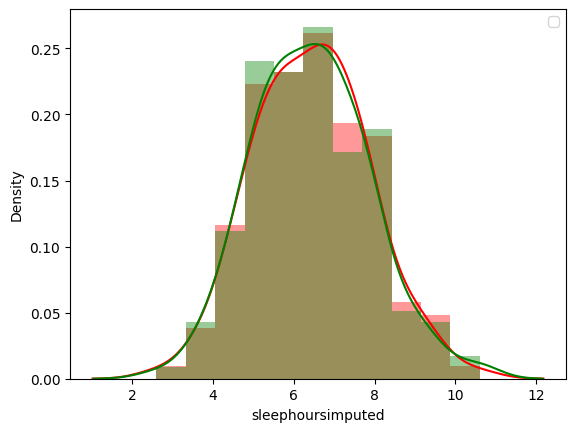

In [73]:
sns.distplot(xtrain["sleep_hours"],color="Red")
sns.distplot(xtrain["sleephoursimputed"],color="Green")
plt.legend()
plt.show()

In [74]:
#random imputation on screen_time_hours column
xtrain.loc[xtrain["screentimeimputedinhours"].isnull(), "screentimeimputedinhours"] = (
    xtrain["screen_time_hours"]
    .dropna()
    .sample(xtrain["screentimeimputedinhours"].isnull().sum(), random_state=42, replace=True)
    .values  
)

xtest.loc[xtest["screentimeimputedinhours"].isnull(), "screentimeimputedinhours"] = (
    xtest["screen_time_hours"]
    .dropna()
    .sample(xtest["screentimeimputedinhours"].isnull().sum(), random_state=42, replace=True)
    .values
)


In [75]:
xtrain.isnull().sum()

sleep_hours                 18
screen_time_hours           17
physical_activity_mins      15
mood_score                  17
social_interaction_score     0
gender                       0
student_type                 0
sleep_quality                0
sleephoursimputed            0
screentimeimputedinhours     0
physicalactmins             15
moodscore                   17
dtype: int64

C:\Users\273309\AppData\Local\Temp\ipykernel_17116\2734335857.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrain["screen_time_hours"],color="red",label="original",hist=False)
C:\Users\273309\AppData\Local\Temp\ipykernel_17116\2734335857.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

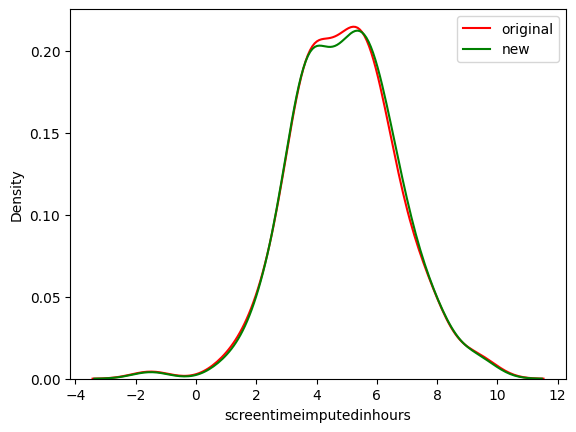

In [76]:
sns.distplot(xtrain["screen_time_hours"],color="red",label="original",hist=False)
sns.distplot(xtrain["screentimeimputedinhours"],color="green",label="new",hist=False)
plt.legend()
plt.show()

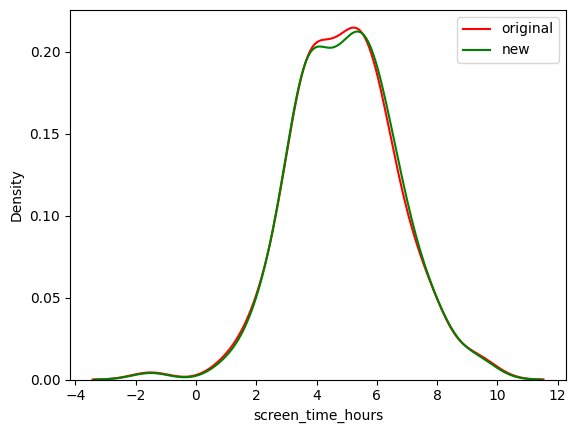

In [77]:
sns.kdeplot(xtrain["screen_time_hours"], color="red", label="original")
sns.kdeplot(xtrain["screentimeimputedinhours"], color="green", label="new")
plt.legend()
plt.show()


In [78]:
#random imputation on physical_activity_mins column
xtrain.loc[xtrain["physicalactmins"].isnull(), "physicalactmins"] = (
    xtrain["physical_activity_mins"]
    .dropna()
    .sample(xtrain["physicalactmins"].isnull().sum(), random_state=42, replace=True)
    .values  
)


xtest.loc[xtest["physicalactmins"].isnull(), "physicalactmins"] = (
    xtest["physical_activity_mins"]
    .dropna()
    .sample(xtest["physicalactmins"].isnull().sum(), random_state=42, replace=True)
    .values
)


In [79]:
print(xtrain["physicalactmins"].isnull().sum())
print(xtest["physicalactmins"].isnull().sum())

0
0


C:\Users\273309\AppData\Local\Temp\ipykernel_17116\2605976832.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrain["physical_activity_mins"],color="red",label="original",hist=False)
C:\Users\273309\AppData\Local\Temp\ipykernel_17116\2605976832.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

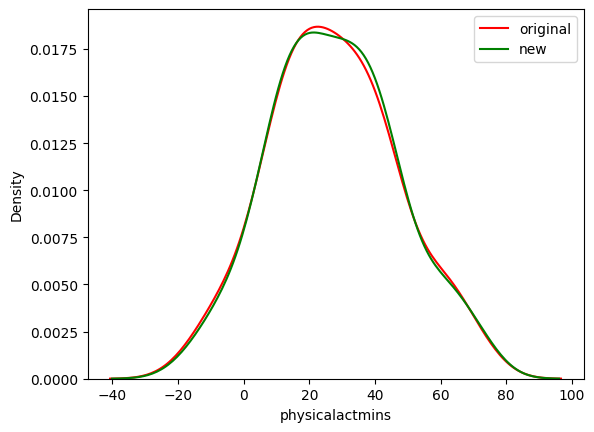

In [80]:
sns.distplot(xtrain["physical_activity_mins"],color="red",label="original",hist=False)
sns.distplot(xtrain["physicalactmins"],color="green",label="new",hist=False)
plt.legend()
plt.show()

In [81]:
#random imputation on mood_score

xtrain.loc[xtrain["moodscore"].isnull(), "moodscore"] = (
    xtrain["mood_score"]
    .dropna()
    .sample(xtrain["moodscore"].isnull().sum(), random_state=42, replace=True)
    .values  # 👉 Ensures proper alignment
)

# If xtest is defined
xtest.loc[xtest["moodscore"].isnull(), "moodscore"] = (
    xtest["mood_score"]
    .dropna()
    .sample(xtest["moodscore"].isnull().sum(), random_state=42, replace=True)
    .values
)


C:\Users\273309\AppData\Local\Temp\ipykernel_17116\775792512.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrain["mood_score"],color="red",label="original",hist=False)
C:\Users\273309\AppData\Local\Temp\ipykernel_17116\775792512.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

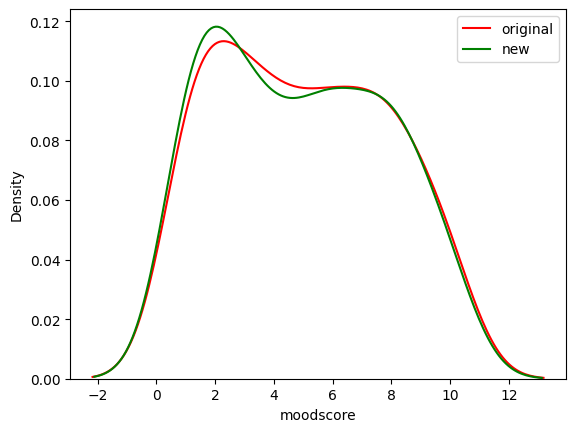

In [82]:
sns.distplot(xtrain["mood_score"],color="red",label="original",hist=False)
sns.distplot(xtrain["moodscore"],color="green",label="new",hist=False)
plt.legend()
plt.show()

In [83]:
xtrain["moodscore"].skew()

np.float64(0.17983454011510294)

In [84]:
print("variance of original=",xtrain["mood_score"].var())
print("variance of new=",xtrain["moodscore"].var())

variance of original= 8.140648084310056
variance of new= 8.203773584905662


In [85]:
xtrain

,sleep_hours,screen_time_hours,physical_activity_mins,mood_score,social_interaction_score,gender,student_type,sleep_quality,sleephoursimputed,screentimeimputedinhours,physicalactmins,moodscore
137,6.0,4.4,22.0,NaN,2,Other,School,Average,6.0,4.4,22.0,2.0
163,5.3,5.8,23.0,3.0,2,Female,School,Poor,5.3,5.8,23.0,3.0
111,6.5,7.2,28.0,6.0,9,Female,Working,Average,6.5,7.2,28.0,6.0
123,4.4,9.2,41.0,10.0,6,Other,Working,Poor,4.4,9.2,41.0,10.0
109,NaN,4.6,13.0,2.0,6,Female,College,Good,5.3,4.6,13.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43,6.0,6.7,NaN,6.0,3,Male,School,Good,6.0,6.7,2.0,6.0
22,6.6,6.4,25.0,4.0,10,Female,School,Good,6.6,6.4,25.0,4.0
72,6.4,7.3,0.0,6.0,9,Female,College,Poor,6.4,7.3,0.0,6.0
15,5.7,NaN,NaN,NaN,9,Male,School,Good,5.7,3.4,36.0,1.0


In [86]:
xtest

,sleep_hours,screen_time_hours,physical_activity_mins,mood_score,social_interaction_score,gender,student_type,sleep_quality,sleephoursimputed,screentimeimputedinhours,physicalactmins,moodscore
112,6.6,6.7,NaN,1.0,2,Male,Working,Poor,6.6,6.7,9.0,1.0
29,6.1,6.4,-5.0,1.0,6,Other,Working,Poor,6.1,6.4,-5.0,1.0
182,4.9,0.8,42.0,5.0,8,Female,College,Poor,4.9,0.8,42.0,5.0
199,4.8,7.5,37.0,9.0,7,Male,Working,Good,4.8,7.5,37.0,9.0
193,4.6,8.7,36.0,2.0,8,Male,College,Poor,4.6,8.7,36.0,2.0
85,5.7,1.1,1.0,5.0,7,Female,Working,Average,5.7,1.1,1.0,5.0
10,5.8,6.1,44.0,8.0,6,Other,College,Good,5.8,6.1,44.0,8.0
54,8.0,2.0,19.0,9.0,3,Female,College,Good,8.0,2.0,19.0,9.0
115,7.0,5.0,45.0,3.0,9,Female,School,Good,7.0,5.0,45.0,3.0
35,4.7,6.3,31.0,9.0,10,Female,School,Average,4.7,6.3,31.0,9.0


In [87]:
xtrain.isnull().sum()

sleep_hours                 18
screen_time_hours           17
physical_activity_mins      15
mood_score                  17
social_interaction_score     0
gender                       0
student_type                 0
sleep_quality                0
sleephoursimputed            0
screentimeimputedinhours     0
physicalactmins              0
moodscore                    0
dtype: int64

In [88]:
xtest.isnull().sum()

sleep_hours                 2
screen_time_hours           3
physical_activity_mins      5
mood_score                  3
social_interaction_score    0
gender                      0
student_type                0
sleep_quality               0
sleephoursimputed           0
screentimeimputedinhours    0
physicalactmins             0
moodscore                   0
dtype: int64

In [89]:
xtrain.isnull().sum()

sleep_hours                 18
screen_time_hours           17
physical_activity_mins      15
mood_score                  17
social_interaction_score     0
gender                       0
student_type                 0
sleep_quality                0
sleephoursimputed            0
screentimeimputedinhours     0
physicalactmins              0
moodscore                    0
dtype: int64

In [90]:
xtrain

,sleep_hours,screen_time_hours,physical_activity_mins,mood_score,social_interaction_score,gender,student_type,sleep_quality,sleephoursimputed,screentimeimputedinhours,physicalactmins,moodscore
137,6.0,4.4,22.0,NaN,2,Other,School,Average,6.0,4.4,22.0,2.0
163,5.3,5.8,23.0,3.0,2,Female,School,Poor,5.3,5.8,23.0,3.0
111,6.5,7.2,28.0,6.0,9,Female,Working,Average,6.5,7.2,28.0,6.0
123,4.4,9.2,41.0,10.0,6,Other,Working,Poor,4.4,9.2,41.0,10.0
109,NaN,4.6,13.0,2.0,6,Female,College,Good,5.3,4.6,13.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43,6.0,6.7,NaN,6.0,3,Male,School,Good,6.0,6.7,2.0,6.0
22,6.6,6.4,25.0,4.0,10,Female,School,Good,6.6,6.4,25.0,4.0
72,6.4,7.3,0.0,6.0,9,Female,College,Poor,6.4,7.3,0.0,6.0
15,5.7,NaN,NaN,NaN,9,Male,School,Good,5.7,3.4,36.0,1.0


In [91]:
xtest.isnull().sum()

sleep_hours                 2
screen_time_hours           3
physical_activity_mins      5
mood_score                  3
social_interaction_score    0
gender                      0
student_type                0
sleep_quality               0
sleephoursimputed           0
screentimeimputedinhours    0
physicalactmins             0
moodscore                   0
dtype: int64

In [92]:
xtrain.isnull().sum()

sleep_hours                 18
screen_time_hours           17
physical_activity_mins      15
mood_score                  17
social_interaction_score     0
gender                       0
student_type                 0
sleep_quality                0
sleephoursimputed            0
screentimeimputedinhours     0
physicalactmins              0
moodscore                    0
dtype: int64

In [93]:
xtrain

,sleep_hours,screen_time_hours,physical_activity_mins,mood_score,social_interaction_score,gender,student_type,sleep_quality,sleephoursimputed,screentimeimputedinhours,physicalactmins,moodscore
137,6.0,4.4,22.0,NaN,2,Other,School,Average,6.0,4.4,22.0,2.0
163,5.3,5.8,23.0,3.0,2,Female,School,Poor,5.3,5.8,23.0,3.0
111,6.5,7.2,28.0,6.0,9,Female,Working,Average,6.5,7.2,28.0,6.0
123,4.4,9.2,41.0,10.0,6,Other,Working,Poor,4.4,9.2,41.0,10.0
109,NaN,4.6,13.0,2.0,6,Female,College,Good,5.3,4.6,13.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43,6.0,6.7,NaN,6.0,3,Male,School,Good,6.0,6.7,2.0,6.0
22,6.6,6.4,25.0,4.0,10,Female,School,Good,6.6,6.4,25.0,4.0
72,6.4,7.3,0.0,6.0,9,Female,College,Poor,6.4,7.3,0.0,6.0
15,5.7,NaN,NaN,NaN,9,Male,School,Good,5.7,3.4,36.0,1.0


In [94]:
#deleting those columns having null values

xtrainm=xtrain.drop(columns=["sleep_hours","screen_time_hours","physical_activity_mins","screen_time_hours","mood_score"])
xtestm=xtest.drop(columns=["sleep_hours","screen_time_hours","physical_activity_mins","screen_time_hours","mood_score"])


In [95]:
print("sleephoursimputed variance=",xtrainm["sleephoursimputed"].var())
print("screentimeimputedinhours variance=",xtrainm["screentimeimputedinhours"].var())

sleephoursimputed variance= 2.0426631289308177
screentimeimputedinhours variance= 2.9633647798742135


In [96]:
xtrainm

,social_interaction_score,gender,student_type,sleep_quality,sleephoursimputed,screentimeimputedinhours,physicalactmins,moodscore
137,2,Other,School,Average,6.0,4.4,22.0,2.0
163,2,Female,School,Poor,5.3,5.8,23.0,3.0
111,9,Female,Working,Average,6.5,7.2,28.0,6.0
123,6,Other,Working,Poor,4.4,9.2,41.0,10.0
109,6,Female,College,Good,5.3,4.6,13.0,2.0
...,...,...,...,...,...,...,...,...
43,3,Male,School,Good,6.0,6.7,2.0,6.0
22,10,Female,School,Good,6.6,6.4,25.0,4.0
72,9,Female,College,Poor,6.4,7.3,0.0,6.0
15,9,Male,School,Good,5.7,3.4,36.0,1.0


In [97]:
xtestm.isnull().sum()

social_interaction_score    0
gender                      0
student_type                0
sleep_quality               0
sleephoursimputed           0
screentimeimputedinhours    0
physicalactmins             0
moodscore                   0
dtype: int64

In [98]:
#transforming data
#tried some method on other file basically rough work


In [99]:
xtrainm.columns

Index(['social_interaction_score', 'gender', 'student_type', 'sleep_quality',
       'sleephoursimputed', 'screentimeimputedinhours', 'physicalactmins',
       'moodscore'],
      dtype='object')

In [100]:
sf = xtrainm.loc[:, ["sleephoursimputed", "screentimeimputedinhours", "physicalactmins", "moodscore", "social_interaction_score"]]
sf.to_csv("yakuza.csv")
print("complete")

complete


In [101]:
sf

,sleephoursimputed,screentimeimputedinhours,physicalactmins,moodscore,social_interaction_score
137,6.0,4.4,22.0,2.0,2
163,5.3,5.8,23.0,3.0,2
111,6.5,7.2,28.0,6.0,9
123,4.4,9.2,41.0,10.0,6
109,5.3,4.6,13.0,2.0,6
...,...,...,...,...,...
43,6.0,6.7,2.0,6.0,3
22,6.6,6.4,25.0,4.0,10
72,6.4,7.3,0.0,6.0,9
15,5.7,3.4,36.0,1.0,9


In [102]:
#creating column transformers

In [103]:
trf1=ColumnTransformer([("encoded_gender",OneHotEncoder(sparse_output=False),["gender"]),("encoded_student_type",OneHotEncoder(sparse_output=False),["student_type"]),("ordered_sleep_quality",OrdinalEncoder(categories=[["Poor","Average","Good"]]),["sleep_quality"])],remainder="passthrough")

In [104]:
trf2 = ColumnTransformer([
    ("transformed", PowerTransformer(method="yeo-johnson", standardize=True),
     ["social_interaction_score", "moodscore"])
], remainder="passthrough")


In [105]:
trf3=ColumnTransformer([("scaled",MinMaxScaler(),["sleephoursimputed","screentimeimputedinhours","physicalactmins"])],remainder="passthrough")


In [106]:
le=LabelEncoder()
ytrain=le.fit_transform(ytrain)
ytest=le.fit_transform(ytest)


E:\Users\273309\anaconda\envs\redcrow\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Users\273309\anaconda\envs\redcrow\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
#creating single column transformer to create pipeline

preprocessor = ColumnTransformer([
    ("encoded_gender", OneHotEncoder(sparse_output=False), ["gender"]),
    ("encoded_student_type", OneHotEncoder(sparse_output=False), ["student_type"]),
    ("ordered_sleep_quality", OrdinalEncoder(categories=[["Poor", "Average", "Good"]]), ["sleep_quality"]),
    ("power_trans", PowerTransformer(method='yeo-johnson', standardize=True), ["social_interaction_score", "moodscore"]),

    ("minmax_scaled", StandardScaler(), ["sleephoursimputed", "screentimeimputedinhours", "physicalactmins"]),
])
selector=SelectKBest(score_func=mutual_info_classif,k="all")



In [108]:
#i tried two algorithms logistic and random forest where random forest gives good accuracy

lo=LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000,C=0.01)
#lo=RandomForestClassifier()

pipe=Pipeline([("preprocessing",preprocessor),("selector",selector),("model",lo)])
pipe.steps

[('preprocessing',
  ColumnTransformer(transformers=[('encoded_gender',
                                   OneHotEncoder(sparse_output=False),
                                   ['gender']),
                                  ('encoded_student_type',
                                   OneHotEncoder(sparse_output=False),
                                   ['student_type']),
                                  ('ordered_sleep_quality',
                                   OrdinalEncoder(categories=[['Poor', 'Average',
                                                               'Good']]),
                                   ['sleep_quality']),
                                  ('power_trans', PowerTransformer(),
                                   ['social_interaction_score', 'moodscore']),
                                  ('minmax_scaled', StandardScaler(),
                                   ['sleephoursimputed',
                                    'screentimeimputedinhours',
              

In [109]:
#i tried gridsearchcv to find out best inputs for logistic regression to give good accuracy but grid search cv didn't given good value so according to me it failed
param_grid = {
    'model__C': [0.001,0.01, 0.1, 1, 10, 100],
    'model__solver': ['lbfgs', 'saga'],
    'model__max_iter': [100, 300, 1000]
}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(xtrainm, ytrain)

print("Best Params:", grid.best_params_)


E:\Users\273309\anaconda\envs\redcrow\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\273309\anaconda\envs\redcrow\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\273309\anaconda\envs\redcrow\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\273309\anaconda\envs\redcrow\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: F

Best Params: {'model__C': 0.1, 'model__max_iter': 100, 'model__solver': 'lbfgs'}


E:\Users\273309\anaconda\envs\redcrow\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\273309\anaconda\envs\redcrow\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\273309\anaconda\envs\redcrow\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\273309\anaconda\envs\redcrow\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: F

In [110]:
pipe.fit(xtrainm,ytrain)

E:\Users\273309\anaconda\envs\redcrow\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,steps,"[('preprocessing', ...), ('selector', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('encoded_gender', ...), ('encoded_student_type', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [111]:
p=pipe.predict(xtest)
p

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [112]:
ytest

array([0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1])

In [113]:
s=accuracy_score(ytest,p)*100
s

82.5

In [117]:
#dumping pipeline into file
a=pkl.dump(pipe,open("stress_estimation_lr.pkl","wb"))
print("dumping successful")

dumping successful
